In [22]:
!pip install pandas sqlalchemy psycopg2 matplotlib seaborn 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text
import json

In [24]:
credentials = "../credentials.json"
with open(credentials) as f:
    creds = json.load(f)

DB_USER = creds["user"]
DB_PASSWORD = creds["password"]
DB_HOST = creds["host"]
DB_PORT = creds["port"]
DB_NAME = creds["database"]

engine = create_engine(f'postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

In [25]:
df = pd.read_sql("SELECT * FROM airbnb_data", con=engine)
display(df.head(25))

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,None
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,None
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,None,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,None,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",None
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,None,None
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",None
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",None
6,1004650,BlissArtsSpace!,61300605564,None,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,None
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,None
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,None
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,None


In [26]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataset tiene 102599 filas y 26 columnas.


In [27]:
duplicates = df[df.duplicated()]
print(f"Número de filas duplicadas: {duplicates.shape[0]}")

Número de filas duplicadas: 541


In [28]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
missing_data = pd.DataFrame({'Valores Nulos': missing_values, 'Porcentaje': missing_percentage})
print("Valores nulos por columna:")
display(missing_data[missing_data['Valores Nulos'] > 0])

Valores nulos por columna:


,Valores Nulos,Porcentaje
NAME,250,0.243667
host_identity_verified,289,0.281679
host name,406,0.395715
neighbourhood group,29,0.028265
neighbourhood,16,0.015595
lat,8,0.007797
long,8,0.007797
country,532,0.518524
country code,131,0.127682
instant_bookable,105,0.102340


In [29]:
display(df.dtypes)

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

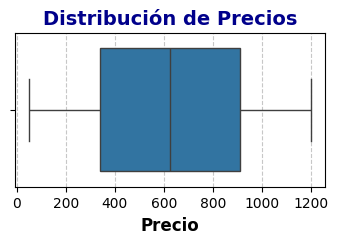

In [30]:
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['price'].str.replace('$', '').str.replace(',', '').astype(float))
plt.title("Distribución de Precios", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Precio", fontsize=12, fontweight="bold")
plt.grid(axis='x', linestyle="--", alpha=0.7)  
plt.show()

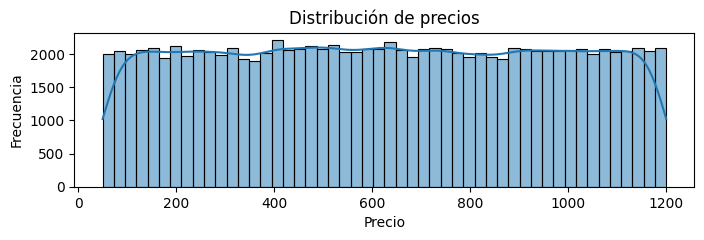

In [31]:
plt.figure(figsize=(8, 2))
sns.histplot(df['price'].str.replace('$', '').str.replace(',', '').astype(float), bins=50, kde=True)
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.title("Distribución de precios")
plt.show()

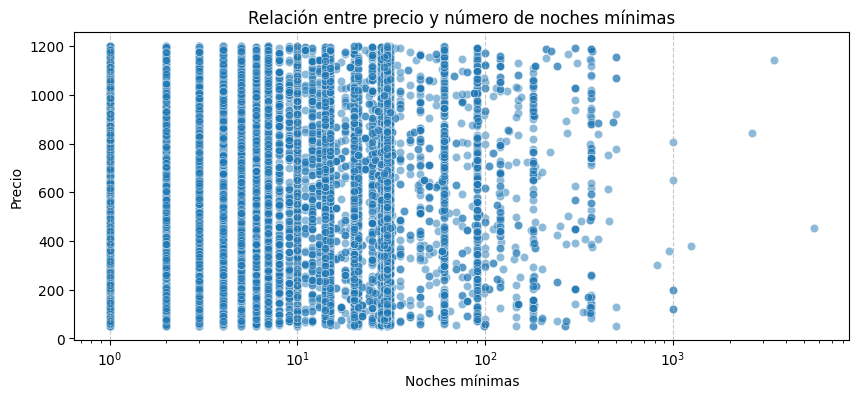

In [32]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df['minimum nights'], y=df['price'].str.replace('$', '').str.replace(',', '').astype(float), alpha=0.5)
plt.xlabel("Noches mínimas")
plt.ylabel("Precio")
plt.title("Relación entre precio y número de noches mínimas")
plt.xscale("log")  # Escala logarítmica para mejor visualización
plt.grid(axis='x', linestyle="--", alpha=0.7)  
plt.show()


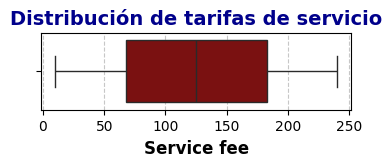

In [33]:
plt.figure(figsize=(4, 1
                    ))
sns.boxplot(x=df['service fee'].str.replace('$', '').str.replace(',', '').astype(float), color= "darkred")
plt.title("Distribución de tarifas de servicio", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Service fee", fontsize=12, fontweight="bold")
plt.grid(axis='x', linestyle="--", alpha=0.7)  
plt.show()

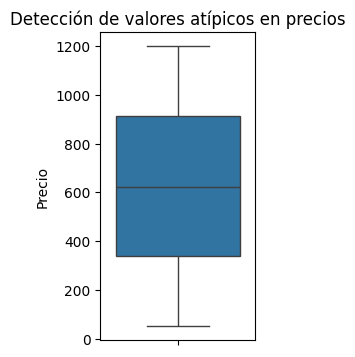

In [34]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=df['price'].str.replace('$', '').str.replace(',', '').astype(float))
plt.ylabel("Precio")
plt.title("Detección de valores atípicos en precios")
plt.show()

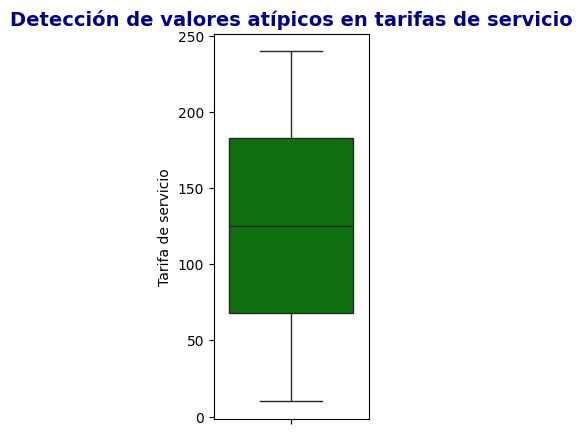

In [35]:
plt.figure(figsize=(2, 5))
sns.boxplot(y=df['service fee'].str.replace('$', '').str.replace(',', '').astype(float), color = "green")
plt.ylabel("Tarifa de servicio")
plt.title("Detección de valores atípicos en tarifas de servicio", fontsize=14, fontweight="bold", color="darkblue") 
plt.show()

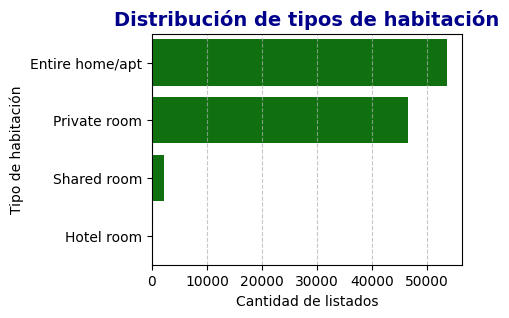

In [36]:
plt.figure(figsize=(4, 3))
sns.countplot(y=df['room type'], order=df['room type'].value_counts().index, color = "green")
plt.xlabel("Cantidad de listados")
plt.ylabel("Tipo de habitación")
plt.title("Distribución de tipos de habitación", fontsize=14, fontweight="bold", color="darkblue") 
plt.grid(axis='x', linestyle="--", alpha=0.7)  
plt.show()

C:\Users\nznic\AppData\Local\Temp\ipykernel_10024\169344710.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['Construction year range'] = pd.cut(df_nan['Construction year'], bins=bins, right=False)


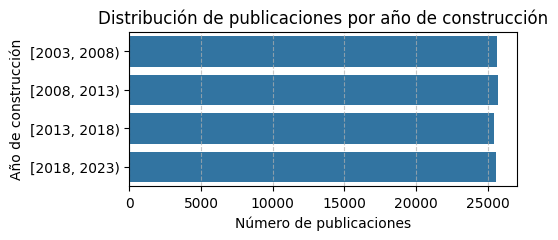

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir filas con NaN en la columna 'Construction year'
df_nan = df.dropna(subset=['Construction year'])

# Crear los intervalos
bins = list(range(int(df_nan['Construction year'].min()), int(df_nan['Construction year'].max()) + 5, 5))
df_nan['Construction year range'] = pd.cut(df_nan['Construction year'], bins=bins, right=False)

# Graficar
plt.figure(figsize=(5, 2))
sns.countplot(y=df_nan['Construction year range'].astype(str), order=sorted(df_nan['Construction year range'].astype(str).unique()))

plt.xlabel("Número de publicaciones")
plt.ylabel("Año de construcción")
plt.title("Distribución de publicaciones por año de construcción")
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

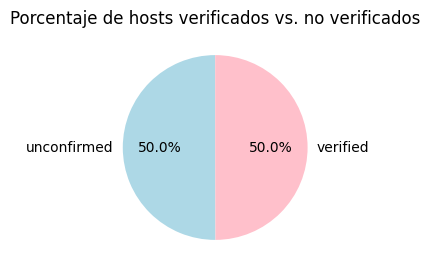

In [38]:
verified_counts = df['host_identity_verified'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(verified_counts, labels=verified_counts.index, autopct='%1.1f%%', colors=["lightblue", "pink"], startangle=90)
plt.title("Porcentaje de hosts verificados vs. no verificados")
plt.show()

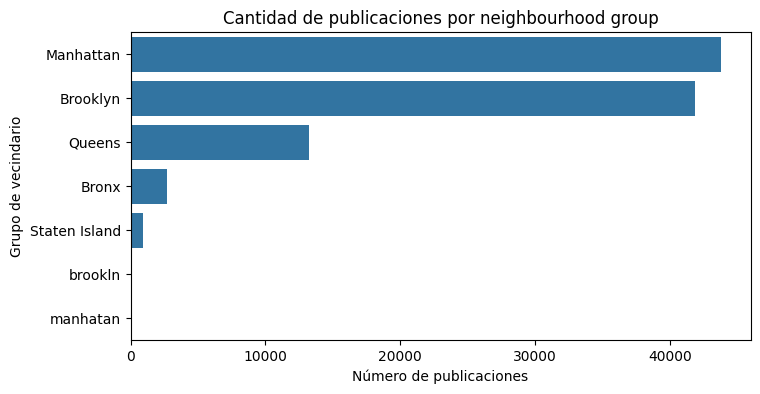

In [39]:
#por ciudad
plt.figure(figsize=(8, 4))
sns.countplot(y=df['neighbourhood group'], order=df['neighbourhood group'].value_counts().index)
plt.xlabel("Número de publicaciones")
plt.ylabel("Grupo de vecindario")
plt.title("Cantidad de publicaciones por neighbourhood group")
plt.show()

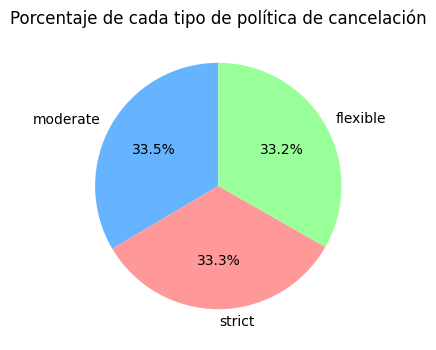

In [40]:
cancellation_counts = df['cancellation_policy'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(cancellation_counts, labels=cancellation_counts.index, autopct='%1.1f%%', colors=["#66b3ff", "#ff9999", "#99ff99", "#ffcc99"], startangle=90)
plt.title("Porcentaje de cada tipo de política de cancelación")
plt.show()

C:\Users\nznic\AppData\Local\Temp\ipykernel_10024\99501756.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_filtered['instant_bookable'], palette=["darkred", "green"])


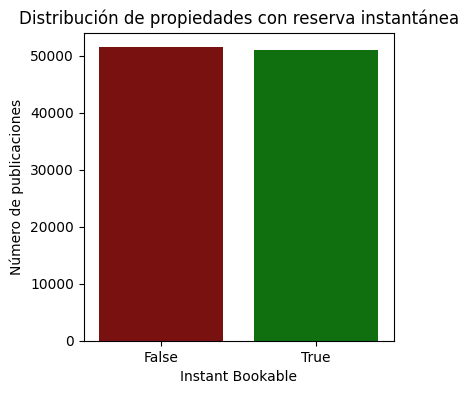

In [41]:
df_filtered = df.dropna(subset=['instant_bookable'])

plt.figure(figsize=(4, 4))
sns.countplot(x=df_filtered['instant_bookable'], palette=["darkred", "green"])
plt.xlabel("Instant Bookable")
plt.ylabel("Número de publicaciones")
plt.title("Distribución de propiedades con reserva instantánea")
plt.show()

In [42]:
min_year = df["Construction year"].min()
max_year = df["Construction year"].max()

print(f"El año mínimo de construcción es: {min_year}")
print(f"El año máximo de construcción es: {max_year}")

El año mínimo de construcción es: 2003.0
El año máximo de construcción es: 2022.0
